In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, color, segmentation, feature, filters, io
from sklearn import cluster
import cv2
%matplotlib inline

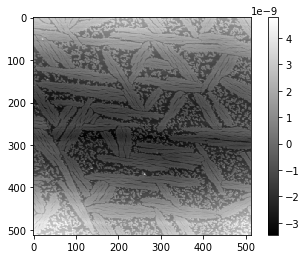

In [3]:
I1 = np.loadtxt('tdj_grbp5_1um_1hr_3rd_020717.001.txt')
#plt.gray()
plt.imshow(I1, cmap = 'gray', interpolation = 'nearest')
plt.colorbar()

In [4]:
def bckgrnd_correc_rect(image, row_len, col_len):
    
    """Background correction using a rectangular structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the row length of the rectangular structuring element
    assert type(row_len) == float, ('Wrong data type', 'row length must be a float')
    
    # Checking the right data type for the column length of the rectangular structuring element
    assert type(col_len) == float, ('Wrong data type', 'column length must be a float')
    
    # background corrrection 
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.rectangle(row_len,col_len))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected

def bckgrnd_correc_sq(image, length):
    
    """Background correction using a square structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(length) == float, ('Wrong data type', 'length of the square structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.square(length))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected

def bckgrnd_correc_disk(image, radius):
    
    """Background correction using a disk structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(radius) == float, ('Wrong data type', 'radius of the disk structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.disk(radius))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected
        

def convert_to_grayscale(image):
    
    """Converting the image to grayscale - where minimum pixel value is 0.0 and maximum pixel value is 1.0"""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # converting to grayscale
    dst = np.zeros(image.shape)
    image_gray = cv2.normalize(image, dst, 0.0, 1.0, cv2.NORM_MINMAX)
    
    # plotting the image
    plt.gray()
    plt.imshow(image_gray)
    plt.colorbar()
    
    return image_gray

C:\Users\sarth\Anaconda2\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


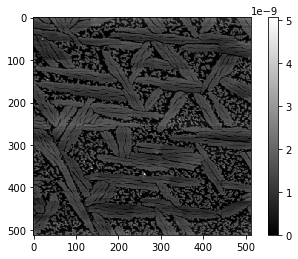

In [5]:
I2 = bckgrnd_correc_sq(I1, 50.0)

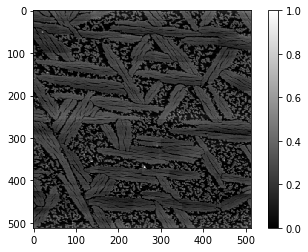

In [6]:
I3 = convert_to_grayscale(I2)

In [22]:
type(I1)

numpy.ndarray

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
from sklearn import cluster
from ImagePreprocessing import convert_to_grayscale

def seg_random_walker(image, marker_threshold):
    
    """Image segmentation using skimage random walker segmentation algorithm. The image """
    
    markers = np.zeros(image.shape)
    markers[image < marker_threshold] = 1 # ordered regions
    markers[image > marker_threshold] = 2 # disordered regions
    
    segmented = segmentation.random_walker(image, markers)
    
    plt.figure()
    seg_image = convert_to_grayscale(segmented)
    plt.title('Segmented Image')

    plt.figure()
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title('Original Image')
    plt.figure()
    plt.imshow(markers, cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title('Markers')

       
    return seg_image
    


C:\Users\sarth\Anaconda2\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:358: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


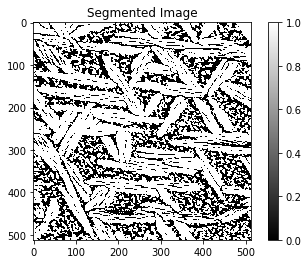

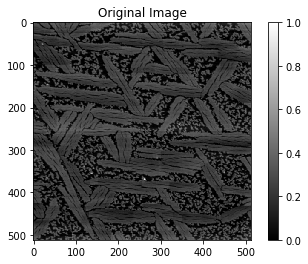

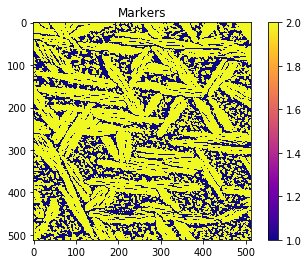

In [9]:
trial = seg_random_walker(I3, 0.15)

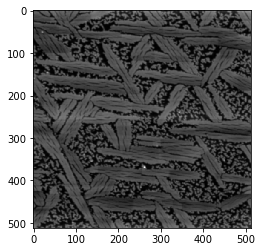

In [88]:
r = filters.gaussian(I3, sigma = 1, mode= 'reflect')
plt.imshow(r)

In [15]:
trial

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [47]:
k_means = cluster.KMeans(n_clusters=2).fit(trial)

In [51]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

In [56]:
trial_compressed = np.choose(labels, values)

In [57]:
values.shape

(2L, 512L)

In [58]:
labels.shape

(512L,)

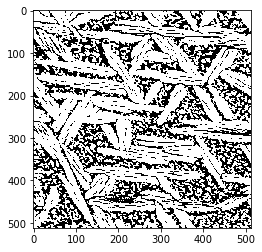

In [10]:
plt.imshow(trial)

In [27]:
q2 = np.reshape(q, (I3.shape[1], I3.shape[1]))

ValueError: total size of new array must be unchanged

In [32]:
kmeans.cluster_centers_

array([[ 0.27118644,  0.26553672,  0.26271186, ...,  0.25423729,
         0.24576271,  0.25706215],
       [ 0.27848101,  0.27848101,  0.25316456, ...,  0.28481013,
         0.30379747,  0.31012658]])

TypeError: Input must be a 2D array.

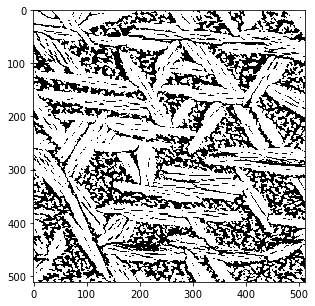

In [13]:
X = trial.reshape((-1, 1))  # We need an (n_sample, n_feature) array
n_clusters = 25
k_means = cluster.KMeans(n_clusters = 25)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
#np.reshape(face_compressed,)
face_compressed.shape = trial.shape

vmin = trial.min()
vmax = trial.max()



# original face
#plt.figure(1)#, figsize=(3, 2.2))
#plt.imshow(trial, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)


# compressed face
#plt.figure(2)#, figsize=(3, 2.2))
#plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [19]:
values.shape

(2L,)

In [22]:
values

array([ 1.,  0.])

In [50]:
img = trial

w = img.shape[1]
h = img.shape[0]

# spatial dimensions
X = np.tile(np.arange(w), (h, 1))
Y = np.tile(np.arange(h), (w, 1)).T

# create feature set
X = X.flatten()
Y = Y.flatten()
I = img.flatten()
S = np.concatenate((I[:, np.newaxis], X[:, np.newaxis], Y[:, np.newaxis]),
                   axis=1)

# normalize features
mean = np.mean(S, axis=0)
std = np.std(S, axis=0, ddof=1)
S = (S - mean) / std

# clustering
k_means = cluster.KMeans(n_clusters=25)
k_means.fit(S)

# extract means of each cluster & clustered intensities population
clusters_means = k_means.cluster_centers_.squeeze()
clusters = k_means.labels_

# get clustered image from clustered intensities
img_clustered = np.choose(clusters, [0.0, 1.0])
img_clustered.shape = img.shape

ValueError: invalid entry in choice array

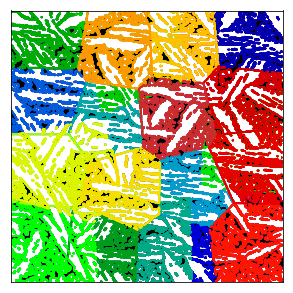

In [44]:
label = np.reshape(clusters, img.shape)
n_clusters=25
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
import hdbscan

ImportError: No module named hdbscan

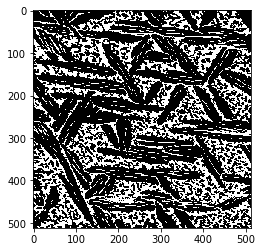

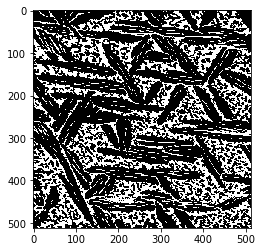

In [165]:
plt.figure()
plt.imshow(img_clustered)

plt.figure()
plt.imshow(img)

In [91]:
X = trial.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=150)
k_means.fit(X)

# extract means of each cluster & clustered population
clusters_means = k_means.cluster_centers_.squeeze()
X_clustered = k_means.labels_
print('# of Observations:', X.shape)
print('Clusters Means:', clusters_means)

# save clustered image
X_clustered.shape = trial.shape

('# of Observations:', (262144L, 1L))
('Clusters Means:', array([ 0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.]))


In [94]:
X_clustered

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

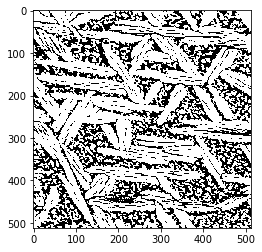

In [93]:
plt.figure()
plt.imshow(X_clustered)

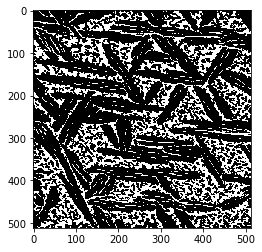

In [89]:
val = filters.threshold_li(I3)

plt.figure()
plt.imshow(I3<val, interpolation = 'nearest')

In [90]:
binary_image = filters.hessian(trial, scale_range=(1, 10), scale_step=2, beta1=0.5, beta2=15)

AttributeError: 'module' object has no attribute 'hessian'

TypeError: unhashable type: 'numpy.ndarray'

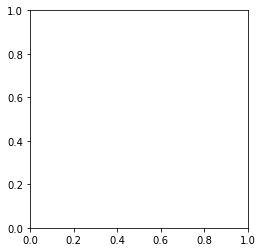

In [64]:
#segments_quick = segmentation.quickshift(trial, kernel_size=3, max_dist=6, ratio=0.5)
segments_fz = segmentation.felzenszwalb(trial, scale=100, sigma=0.5, min_size=50)
plt.figure()
plt.imshow(trial, segments_fz)

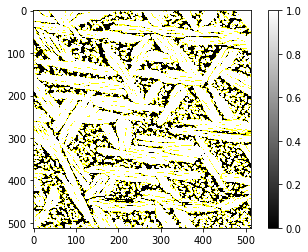

In [58]:
segments_quick = segmentation.mark_boundaries(trial,X_clustered)

plt.figure()
plt.imshow(segments_quick)
plt.colorbar()

In [68]:
import skimage

cv = skimage.segmentation.morphological_chan_vese(trial, mu=0.55, lambda1=1, lambda2=1, tol=1e-3, max_iter=200, 
               dt=0.5, init_level_set="checkerboard", extended_output=True)

plt.figure()
plt.imshow(trial)
plt.imshow(cv[0])


AttributeError: 'module' object has no attribute 'morphological_chan_vese'

In [72]:
w = morphology.remove_small_objects(trial, 6)

plt.imshow(w)

TypeError: Only bool or integer image types are supported. Got float64.

In [120]:
img_clustered = np.choose(X_clustered, [512, 0])

In [123]:
from skimage.filters import threshold_otsu
img_clustered.shape = img.shape


# otsu thresholding of the binary image obtained
threshold = threshold_otsu(img_clustered)
img_thresholded = img_clustered > threshold

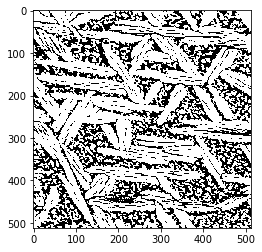

In [124]:
plt.imshow(img_thresholded)

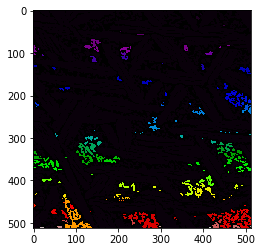

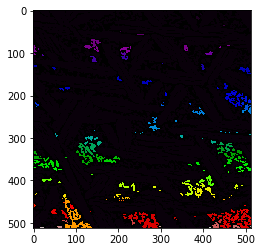

In [80]:
from skimage import measure
pep = trial > 0.01 * trial.mean()

all_labels = measure.label(pep)

pep_labels = measure.label(pep, background=0.1)

plt.figure()
plt.imshow(all_labels, cmap='spectral')
plt.figure()
plt.imshow(pep_labels, cmap='spectral')

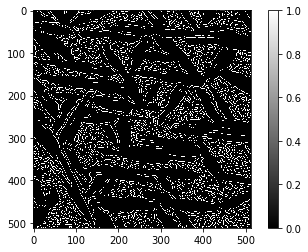

In [131]:
I_canny = feature.canny(I3, sigma = 2.0, low_threshold = 0.15)
plt.imshow(I_canny, cmap = 'gray')
plt.colorbar()

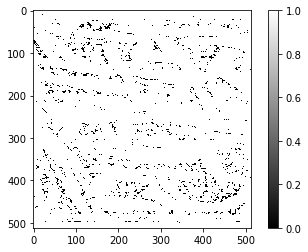

In [195]:
from scipy import ndimage as ndi

fill_holes = ndi.binary_fill_holes(I3, structure=np.ones((10,100))).astype(int)

plt.imshow(fill_holes, cmap = 'gray')
plt.colorbar()

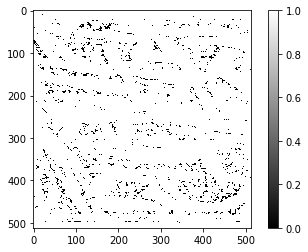

In [144]:
cleaned = morphology.remove_small_objects(fill_holes, 21)

plt.imshow(fill_holes, cmap = 'gray')
plt.colorbar()

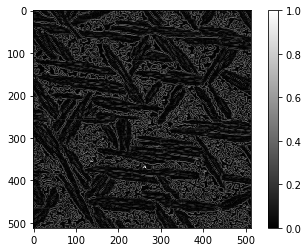

In [159]:
region_based = filters.sobel(I2)

region_based = convert_to_grayscale(region_based)





In [171]:
ret, thresh = cv2.threshold(I3, 88, 255, cv2.THRESH_BINARY)

thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
derp, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                             cv2.CHAIN_APPROX_SIMPLE)
cnts = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(cnts)
box = cv2.boxPoints(rect)
box = np.int0(box)
hello = cv2.drawContours(I3, [box], 0, (0, 0, 255), 2)
plt.figure()
plt.plot(133), plt.imshow(hello)
plt.figure()
plt.scatter(box[:, 0], box[:, 1], c='yellow')

error: ..\..\..\modules\imgproc\src\thresh.cpp:782: error: (-210)  in function cv::threshold


(<matplotlib.text.Text at 0x1577e080>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

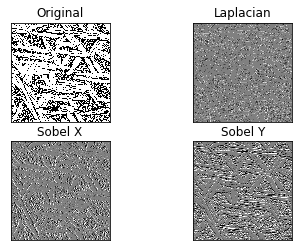

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = trial

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

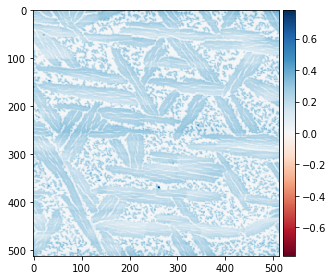

In [49]:
filt_real, filt_imag = filters.gabor(I3, frequency=0.85)

gk = filters.gabor_kernel(frequency=0.2, bandwidth=0.1)

plt.figure()            
io.imshow(filt_real)    
io.show()      

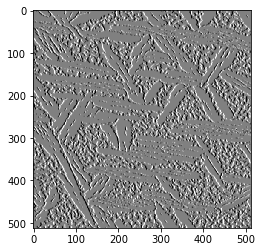

In [27]:
I4 = plt.imshow(sobelx,cmap = 'gray')

In [34]:
import scipy as sp
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

face = trial

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.40) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 150

Spectral clustering: kmeans, 593.75s
Spectral clustering: discretize, 502.66s


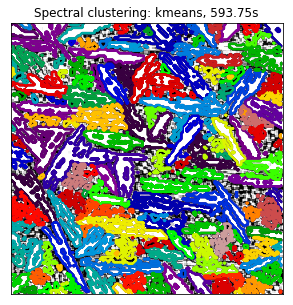

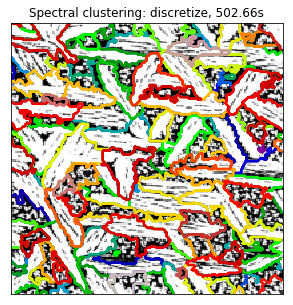

In [36]:
import time

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [1]:
plt.imshow(labels)

NameError: name 'plt' is not defined

In [41]:
from scipy.spatial import ConvexHull
hull = ConvexHull(trial(-1,1))

TypeError: 'numpy.ndarray' object is not callable

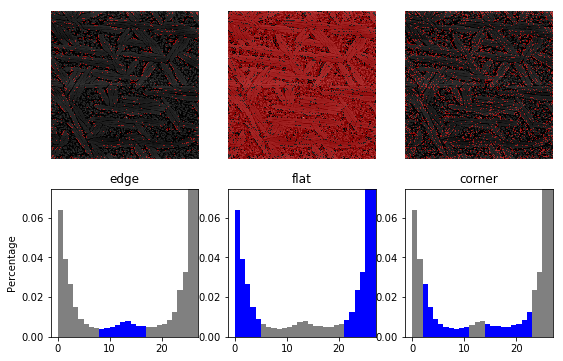

In [32]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

METHOD = 'uniform'

# settings for LBP
radius = 5
n_points = 5 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('b')


image = I3
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(ymax=np.max(counts[:-1]))
    ax.set_xlim(xmax=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

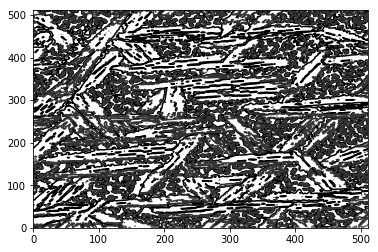

In [97]:
plt.contour(I3)

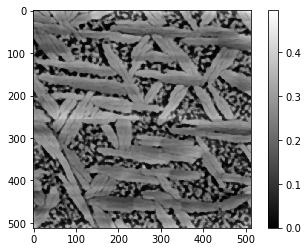

In [124]:
from scipy import ndimage, signal
w = ndimage.median_filter(I3, 7)
plt.figure()
plt.imshow(w)
plt.colorbar()

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

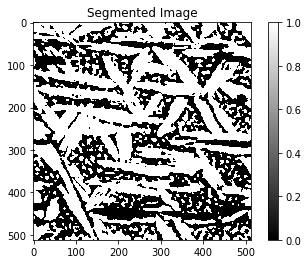

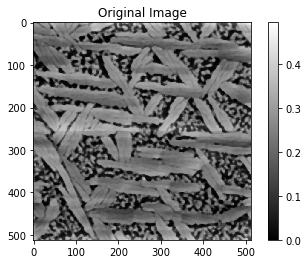

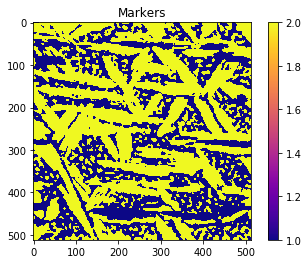

In [125]:
seg_random_walker(w,0.2)

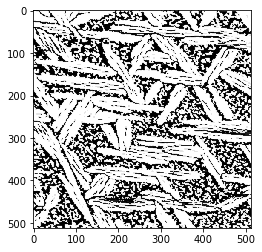

In [140]:
plt.figure()
plt.imshow(signal.wiener(trial))

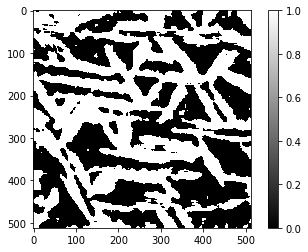

In [197]:
r = ndimage.percentile_filter(trial, 30, 14)
plt.imshow(r)
plt.colorbar()

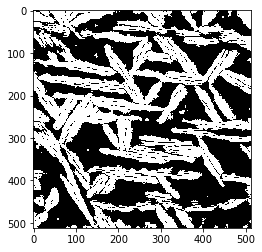

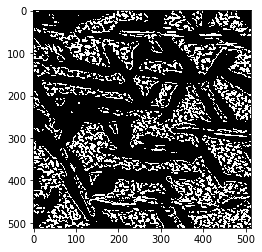

In [209]:
q = r==1
Iseg1 = np.zeros_like(trial)
Iseg2 = np.zeros_like(trial)

#q = np.tile(q, [1,1,1])

#Iseg1[q[0,:,:]] = trial[q[0,:,:]]
#Iseg2[~q[0,:,:]] = trial[~q[0,:,:]]

Iseg1[q] = trial[q]
Iseg2[~q] = trial[~q]

plt.figure()
plt.imshow(Iseg1)
plt.figure()
plt.imshow(Iseg2)

In [148]:
Iseg1(q) = trial[q]

SyntaxError: can't assign to function call (<ipython-input-148-17b35e1203d4>, line 1)

In [163]:
a = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
b = np.array([True, False, True, False, True, False, True, False, True, False])
c = a[b]
c

array([1, 3, 5, 7, 9])

In [164]:
q.shape

(1L, 512L, 512L)

In [156]:
Iseg1.shape

(512L, 512L)

In [173]:
q = np.tile(q, [1,1,1])


In [181]:
q[0,:,:]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]], dtype=bool)

In [205]:
q = r==1
q.shape

(512L, 512L)

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


def order_disorder_separation(image, percentile, size):
    
    """Seperates the input image into order and disorder regions using percentile_filter from scipy.ndimage.
    This function will also provide parameters such as order-diorder ratio, order percentage, disorder percentage 
    and total percent coverage from the separated images.
    
    Input image must already be segmented from the background. Output of this function will be filtered image,
    original image, image with ordered regions and image with disoredered regions."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the percentile
    assert type(percentile) == int, ('Wrong data type', 'percentile must be an integer')
    
    # Checking the right data type for the size
    assert type(size) == int, ('Wrong data type', 'size must be an integer')
    
    # Using percentile filter to filter image into two labels - 0 and 1 
    filt_img = ndimage.percentile_filter(image, percentile, size, mode='reflect')
    
    plt.figure(dpi = 300)
    plt.imshow(filt_img)
    plt.colorbar()
    plt.title('Filtered image', fontsize = 25)
    
    # creating a boolean array of all the labels - True = label == 1 and False = label == 0
    q = filt_img == 1
    
    # creating empty arrays similar to input image
    I_ordered = np.zeros_like(image)
    I_disordered = np.zeros_like(image)
    
    # Assigning values for ordered and disordered regions
    I_ordered[q] = image[q]
    I_disordered[~q] = image[~q]
    
    # Plotting Original, Ordered and Disordered Image
    
    plt.figure(dpi = 300)
    plt.imshow(image)
    plt.title('Original segmented image', fontsize = 25)
    
    plt.figure(dpi = 300)
    plt.imshow(I_ordered)
    plt.colorbar()
    plt.title('Ordered region', fontsize = 25)
    
    plt.figure(dpi = 300)
    plt.imshow(I_disordered)
    plt.colorbar()
    plt.title('Diordered region', fontsize = 25)
    plt.tight_layout()
    
    # Calculating order disorder ratio, percent coverage of ordered, disordered and overall
    Order_Disorder_ratio = np.sum(np.sum(I_ordered)) / np.sum(np.sum(I_disordered))
    
    Percent_ordered =100* (np.sum(np.sum(I_ordered)) / (image.shape[0] * image.shape[1]))
    
    Percent_diordered =100 * (np.sum(np.sum(I_disordered)) / (image.shape[0] * image.shape[1]))
    
    Percent_coverage = Percent_ordered + Percent_diordered
    
    print 'Order-Disorder ratio = %.5f' %(Order_Disorder_ratio)
    print 'Order Percentage = %.5f' %(Percent_ordered)
    print 'Disorder Percentage = %.5f' %(Percent_diordered)
    print 'Coverage Percentage = %.5f' %(Percent_coverage)
    
    return filt_img, I_ordered, I_disordered

Order-Disorder ratio = 1.96829
Order Percentage = 45.36591
Disorder Percentage = 23.04840
Coverage Percentage = 68.41431


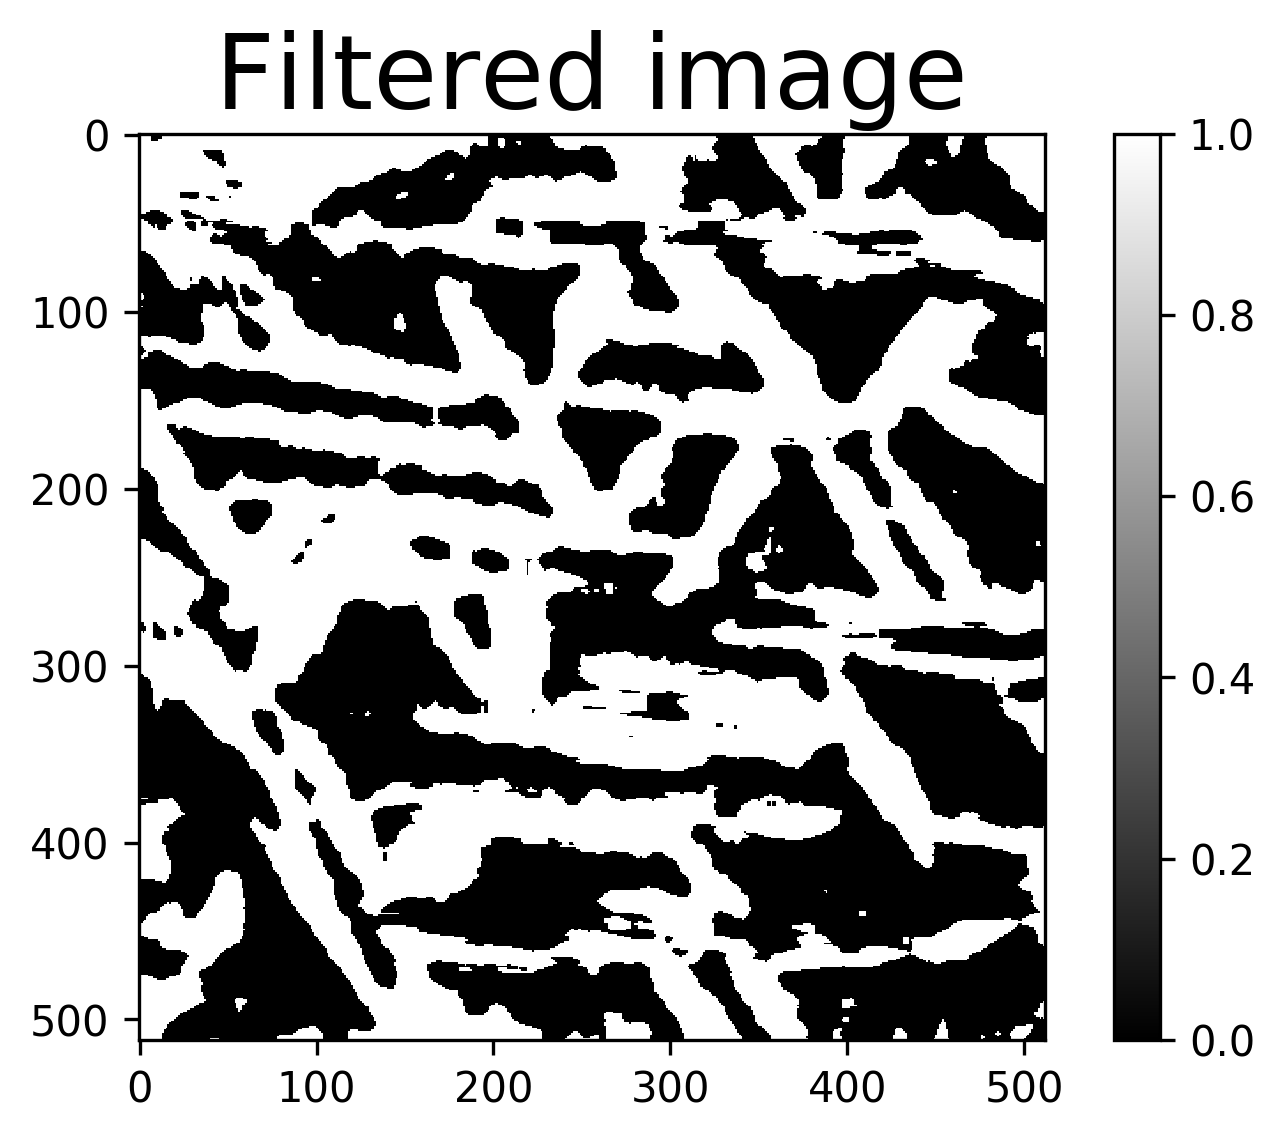

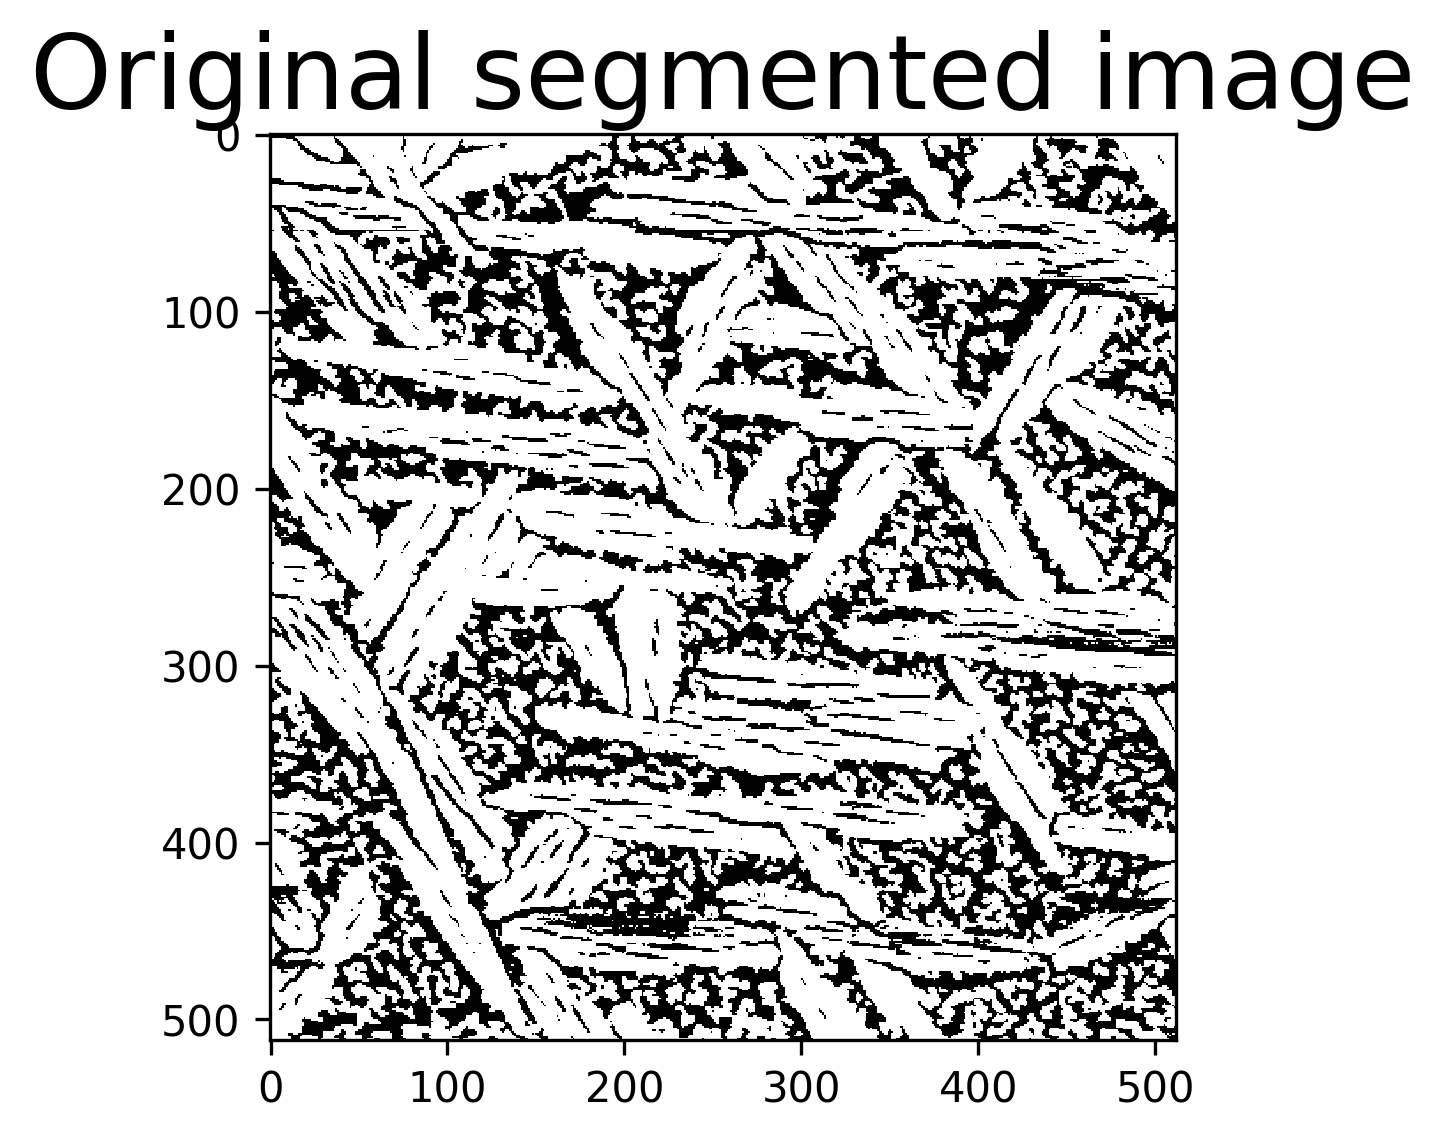

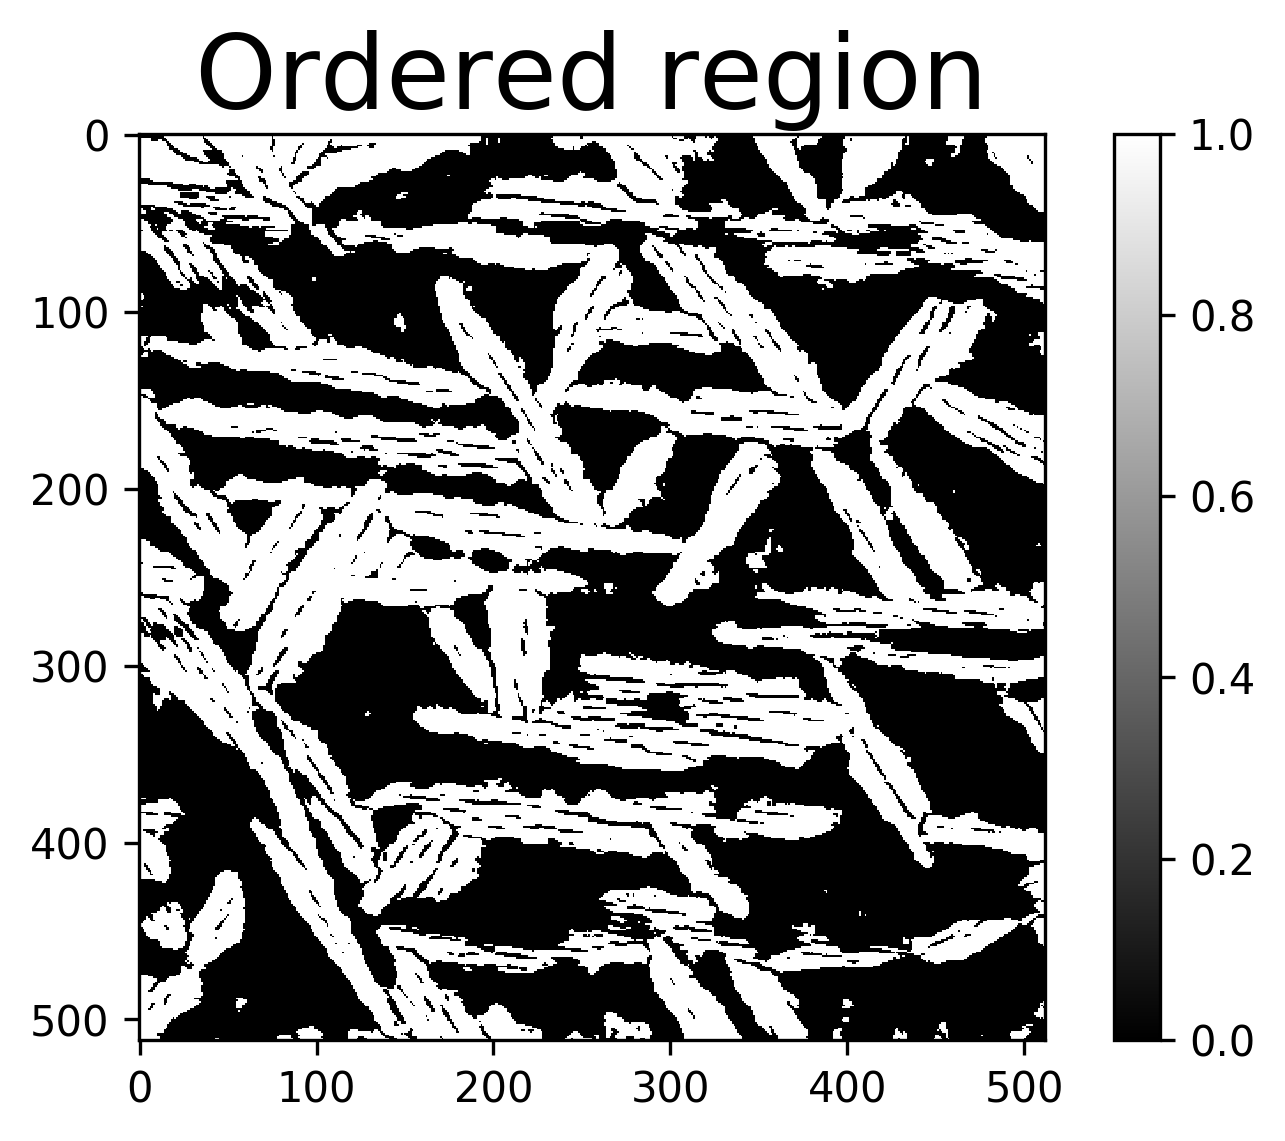

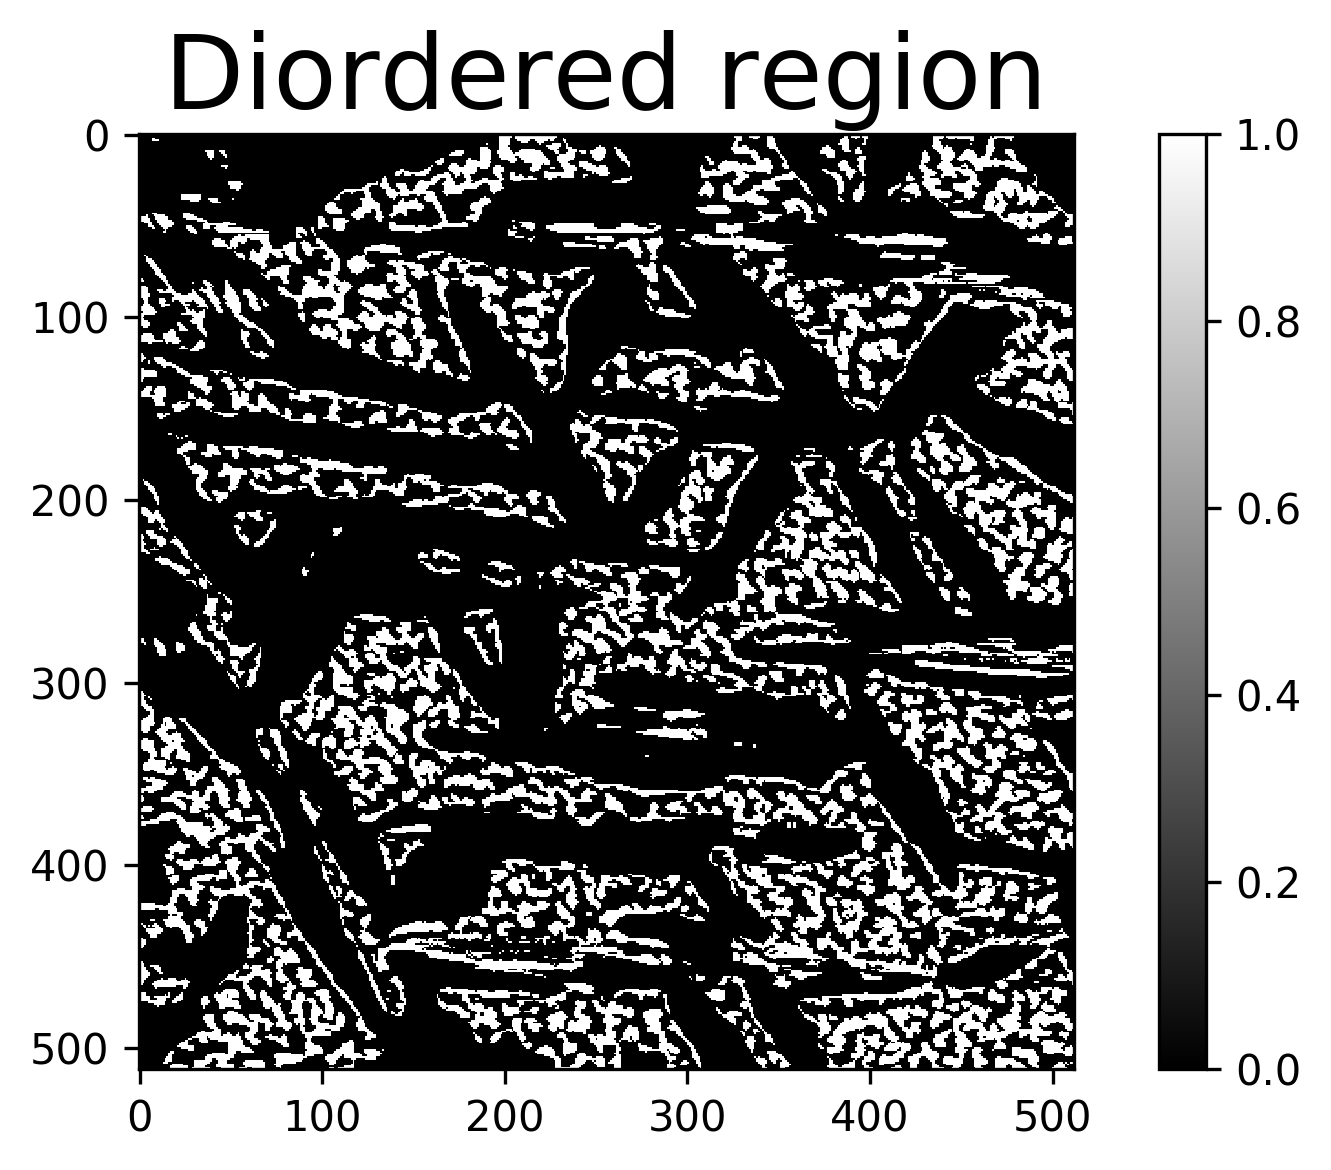

In [239]:
jk = order_disorder_separation(trial, 30, 15)